# Повышение эффективности моделей

Задание: Решить задачу с идентификацией краж в магазинах (данные практики 2) или альтернативные варианты приведенные ниже методами k-NN, SVM, Naive Bayes, C4.5/C5.0 и провести оценку качества. Выполнить кроссвалидацию и сравнить качество получаемых результатов с результатами, полученными на предыдущем этапе. Построить композицию моделей и сравнить качество модели с предыдущими результатами.

Выполним задание на уже знакомых данных DataSet2_1.csv

**DataSet2_1** – Данные о кражах в магазинах самообслуживания (задача классификации)

*trustLevel* - Индивидуальный уровень доверия клиента. 6: Высочайшая надежность

*totalScanTimeInSeconds* - Общее время в секундах между первым и последним отсканированным продуктом

*grandTotal* - Общая стоимость отсканированных продуктов

*lineItemVoids* - Количество аннулированных сканирований

*scansWithoutRegistration* - Количество попыток сканирования без какого-либо сканирования (неудачное сканирование)

*quantityModification* - Число изменений количества товаров для одного из сканируемых продуктов

*scannedLineItemsPerSecond* - Среднее количество отсканированных продуктов в секунду

*valuePerSecond* - Средняя общая стоимость отсканированных продуктов в секунду

*lineItemVoidsPerPosition* - Отношение числа аннулированных сканирований к общему числу аннулированных и не аннулированных сканирований

*fraud* - Классификатор как мошенничество (1) или не мошенничество (0)

Данные для работы можно найти здесь: https://goo.su/Xx1I

Для начала выполним классификацию с использованием известных нам моделей + используем несколько новых классификаторов, таких как наивный Байесовский классификатор и классификатор с помощью дерева решений(на R этот метод называется C5). С классификаторами kNN, SVM мы уже знакомы.

### Несколько слов о Наивном Байесовском классификаторе:

Наивный байесовский классификатор — один из простейших алгоритмов классификации, основанный на применении теоремы Байеса с сильным наивным предположением об условной независимости. Хотя в настоящее время это уже не самая современная классификационная модель, ее математика проста и элегантна. Предполагается, что все функции в X взаимно независимы и зависят от y.

[Подробно читайте тут](https://academy.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)
[Ещё тут](https://labelme.medium.com/%D0%BD%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9-%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9-%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80-naive-bayes-classifier-b939578f6e3b)


### Несколько слов о деревьях решений:

Дерево решений — классификатор, построенный на основе решающих правил вида «если, то», упорядоченных в древовидную иерархическую структуру.

В основе работы дерева решений лежит процесс рекурсивного разбиения исходного множества объектов на подмножества, ассоциированные с предварительно заданными классами. Разбиение производится с помощью решающих правил, в которых осуществляется проверка значений атрибутов по заданному условию.

[Подробно читайте тут](https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('./DataSet2_1.csv',sep='|')
# разбиваем данные на тренировочную и тестовую выборку
X = data.drop(columns=['fraud'])
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test)

svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(X_train, y_train)
res_svm = svm_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

Оценим качество предсказаний, посчитав accuracy и построив ROC-кривую

Доля правильных ответов:
        kNN:0.925531914893617
        SVM:0.9680851063829787
        Naive Bayes:0.848404255319149
        Decision Tree:0.9547872340425532
        


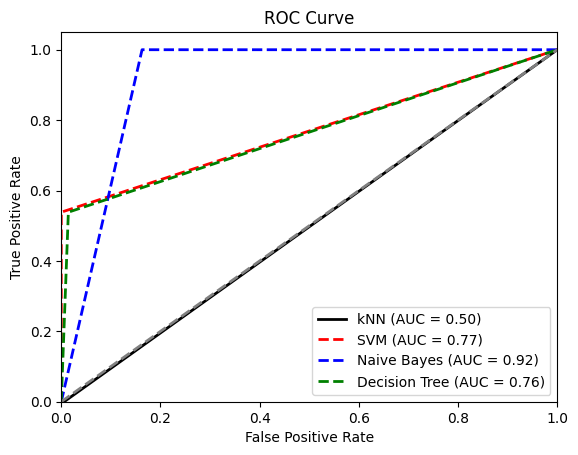

In [ ]:
#вычисление доли правильных ответов
knn_acc = accuracy_score(y_test, res_knn)
svm_acc = accuracy_score(y_test, res_svm)
nb_acc = accuracy_score(y_test, res_nb)
dt_acc = accuracy_score(y_test, res_dt)

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_svm = roc_auc_score(y_test, res_svm)
auc_nb = roc_auc_score(y_test, res_nb)
auc_dt = roc_auc_score(y_test, res_dt)

print(f'''Доля правильных ответов:
        kNN:{knn_acc}
        SVM:{svm_acc}
        Naive Bayes:{nb_acc}
        Decision Tree:{dt_acc}
        ''')

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

В машинном обучении, особенно в контексте классификации, методы predict и predict_proba имеют разные назначения и возвращают различный тип информации.

1. **Метод predict:**
Этот метод используется для получения окончательных предсказаний классов. Он возвращает дискретные значения, которые представляют собой предсказанные классы для каждого экземпляра в тестовом наборе. Например, если у вас есть бинарная классификация, predict вернет 0 или 1 в зависимости от того, к какому классу принадлежит экземпляр.
2. **Метод predict_proba:**
Этот метод возвращает вероятности принадлежности каждого экземпляра к каждому из классов. Для бинарной классификации он вернет два значения: вероятность принадлежности к классу 0 и вероятность принадлежности к классу 1. Эти вероятности могут быть использованы для более тонкой настройки порога классификации, что позволяет лучше управлять балансом между истинными положительными и ложными положительными результатами.

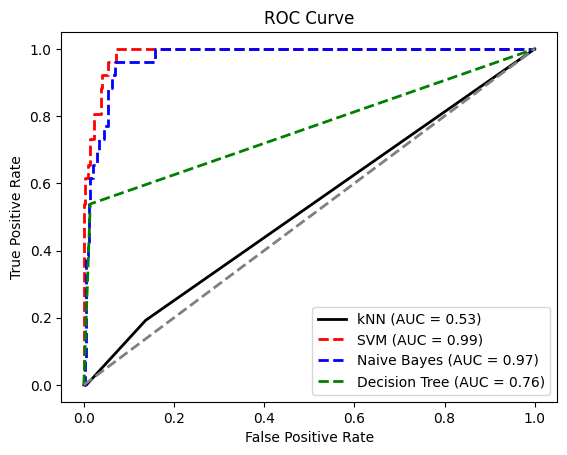

In [ ]:
# предскажем вероятности классов


res_knn_proba = knn_model.predict_proba(X_test)[:, 1]
res_svm_proba = svm_model.predict_proba(X_test)[:, 1]
res_nb_proba = nb_model.predict_proba(X_test)[:, 1]
res_dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn_proba )
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm_proba )
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb_proba )
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt_proba )

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn_proba  = roc_auc_score(y_test, res_knn_proba )
auc_svm_proba  = roc_auc_score(y_test, res_svm_proba )
auc_nb_proba  = roc_auc_score(y_test, res_nb_proba )
auc_dt_proba  = roc_auc_score(y_test, res_dt_proba )

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label=f'kNN (AUC = {auc_knn_proba :.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm_proba :.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb_proba :.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt_proba :.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Кроссвалидация

Кросс-валидация или скользящий контроль — процедура эмпирического оценивания обобщающей способности алгоритмов. С помощью кросс-валидации эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.
Есть несколько видов кросс-валидации, почитать об этом можно [тут,](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)
[а ещё тут](https://academy.yandex.ru/handbook/ml/article/kross-validaciya)


k-кратная кросс-валидация (k-fold) - это когда набор данных случайным образом разбивается на группы k раз. Одна из групп используется в качестве тестового набора, а остальные — в качестве обучающего набора. Модель обучается на обучающем наборе и оценивается на тестовом наборе. Затем процесс повторяется до тех пор, пока каждая уникальная группа не будет использоваться в качестве тестового набора.

Например, для 5-кратной перекрестной проверки набор данных будет разделен на 5 групп, а модель будет обучена и протестирована 5 отдельных раз, чтобы каждая группа получила шанс стать тестовым набором. Это можно увидеть на графике ниже.

![image.png](attachment:image.png)

[Источник](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a#:~:text=Cross%2Dvalidation%20is%20when%20the,used%20as%20the%20test%20set.)

Кстати, метод разделения на тестовую и тренировочную выборки, который мы использовали ранее, называется "Hold-out".

Кросс-валидация лучше, чем использование метода hold-out, поскольку оценка метода hold-out зависит от того, как данные разделены на обучающий и тестовый наборы. Кросс-валидация дает модели возможность протестировать несколько разбиений, чтобы мы могли получить лучшее представление о том, как модель будет работать на различных данных.

Мы воспользуемся функцией из библиотеки scikit-learn cross_val_score, которая используется для выполнения кросс-валидированного прогноза (предсказания) модели на данных. Она выполняет оценку модели на каждом фолде кросс-валидации и возвращает массив с прогнозами для каждого объекта данных.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_scores = cross_val_score(knn_model_cv, X, y, cv=5)
print('--------------kNN---------------')
print(knn_cv_scores)
print(f'kNN cv_scores mean:{np.mean(knn_cv_scores)}')

svm_model_cv = SVC(probability=True, kernel="linear")
svm_cv_scores = cross_val_score(svm_model_cv, X, y, cv=5)
print('--------------SVM---------------')
print(svm_cv_scores)
print(f'SVM cv_scores mean:{np.mean(svm_cv_scores)}')

nb_model_cv = GaussianNB()
nb_cv_scores = cross_val_score(nb_model_cv, X, y, cv=5)
print('-----------Naive Bayes------------')
print(nb_cv_scores)
print(f'Naive Bayes cv_scores mean:{np.mean(nb_cv_scores)}')

dt_model_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model_cv, X, y, cv=5)
print('----------Decision Tree----------')
print(dt_cv_scores)
print(f'Decision tree cv_scores mean:{np.mean(dt_cv_scores)}')

--------------kNN---------------
[0.93351064 0.92021277 0.93351064 0.93351064 0.94133333]
kNN cv_scores mean:0.9324156028368794
--------------SVM---------------
[0.96808511 0.97340426 0.97340426 0.97340426 0.97333333]
SVM cv_scores mean:0.9723262411347517
-----------Naive Bayes------------
[0.81117021 0.83776596 0.82712766 0.85638298 0.84533333]
Naive Bayes cv_scores mean:0.8355560283687945
----------Decision Tree----------
[0.9787234  0.96542553 0.96010638 0.96276596 0.968     ]
Decision tree cv_scores mean:0.9670042553191489


Также кросс-валидация может быть использована для подбора гиперпараметров модели.
Например, для kNN классификатора не очевидно, сколько именно ближайших соседей выбрать для наилучшей работы классификатора.

Ответ на этот вопрос поможет найти кросс-валидация:

При построении нашей первоначальной модели k-NN мы установили параметр n_neighbors равным 3 в качестве отправной точки без какой-либо реальной логики в этом выборе.
Мы воспользуемся GridSearchCV, чтобы найти оптимальное значение для n_neighbours.

GridSearchCV работает путем многократного обучения нашей модели по заданному нами диапазону параметров. Таким образом, мы можем протестировать нашу модель с каждым параметром и определить оптимальные значения, чтобы получить результаты с максимальной точностью.

Для нашей модели мы укажем диапазон значений n_neighbors, чтобы увидеть, какое значение лучше всего подходит для нашей модели. Для этого мы создадим словарь, установив в качестве ключа «n_neighbors» и используя numpy для создания массива значений от 1 до 20.

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_model_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_gscv = GridSearchCV(knn_model_2, param_grid, cv=5)
knn_gscv.fit(X, y)
# проверим, какой параметр оказался наилучшим
print('Наилучшее колическтво соседей:', knn_gscv.best_params_)
print('Наилучшая accuracy:', knn_gscv.best_score_)

Наилучшее колическтво соседей: {'n_neighbors': 4}
Наилучшая accuracy: 0.9446524822695036


### Композиция моделей

Композиция моделей (ансамбль) - это метод машинного обучения, который объединяет несколько индивидуальных моделей для создания более мощной модели, способной к более точным прогнозам.

![image.png](attachment:image.png)

[Источник](https://livebook.manning.com/book/grokking-machine-learning/chapter-12/v-15/1)

Преимущества композиции моделей включают улучшение качества прогнозов, уменьшение переобучения, увеличение устойчивости и улучшение интерпретируемости. Однако это может потребовать больше вычислительных ресурсов и времени на обучение, так как несколько моделей обучаются и объединяются.

Существует три основных типа композиции моделей:

1. **Стекинг**. Могут рассматриваться разнородные отдельно взятые модели. Существует мета-модель, которой на вход подаются базовые модели, а выходом является итоговый прогноз.

2. **Бэггинг**. Рассматриваются однородные модели, которые обучаются независимо и параллельно, а затем их результаты просто усредняются. Ярким представителем данного метода является случайный лес.

3. **Бустинг**. Рассматриваются однородные модели, которые обучаются последовательно, причем последующая модель должна исправлять ошибки предыдущей. Конечно, в качестве примера здесь сразу приходит на ум градиентный бустинг.

Для построения ансамбля мы воспользуемся методом StackingClassifier из scikit-learn.

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', SVC(probability=True, kernel="linear")),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
res_stacking = stacking_model.predict(X_test)

Оценим качество работы этого классификатора:

Доля правильных ответов для ансамбля моделей: 0.973404255319149


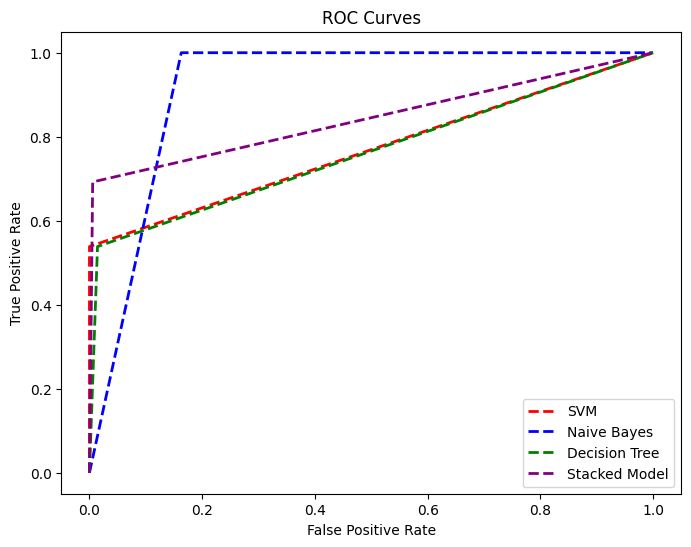

In [ ]:
stacking_acc = accuracy_score(y_test, res_stacking)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, res_stacking)
auc_stacking = roc_auc_score(y_test, res_stacking)

print('Доля правильных ответов для ансамбля моделей:', stacking_acc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label='SVM')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label='Decision Tree')
plt.plot(fpr_stacking, tpr_stacking, color='purple', lw=2, linestyle='--', label='Stacked Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()